In [1]:
import matplotlib as mat
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
mat.rcParams['agg.path.chunksize'] = 1000000000000

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
DIR_NAME = "zipfilee_FILES/ds_data/"
TRAIN_FILE = "data_train.csv"
TEST_FILE = "data_test.csv"

In [3]:
train = pd.read_csv(DIR_NAME+TRAIN_FILE)
test = pd.read_csv(DIR_NAME+TEST_FILE)

In [7]:
print(train.shape)
print(test.shape)

(596000, 58)
(892816, 57)


In [10]:
test.head(10)

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,num11,num12,num13,num14,num15,num16,num17,num18,num19,num20,num21,num22,num23,der1,der2,der3,der4,der5,der6,der7,der8,der9,der10,der11,der12,der13,der14,der15,der16,der17,der18,der19,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14
0,0,0,8,0,1,0,0,0,0,0,0,0,12,1,0,0,0.5,0.3,0.610328,1.0,0.316228,0.669556,0.352136,3.464102,0.1,0.8,0.6,1,1,6,3,6,2,9,1,1,1,12,0,1,1,0,0,1.0,1.0,0.0,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,65
1,1,4,5,0,0,0,1,0,0,0,0,0,5,1,0,0,0.9,0.5,0.771362,1.0,0.316228,0.606320,0.358329,2.828427,0.4,0.5,0.4,3,3,8,4,10,2,7,2,0,3,10,0,0,1,1,0,2.0,1.0,0.0,4.0,1.0,NaN,0,0.0,11,1.0,1,0.0,1,103
2,2,5,3,0,0,0,1,0,0,0,0,0,10,0,0,0,0.4,0.0,0.916174,3.0,0.400000,0.896239,0.398497,3.316625,0.6,0.6,0.6,2,3,7,4,6,3,12,4,0,2,4,0,0,0,0,0,1.0,0.0,0.0,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,29
3,3,0,6,1,0,0,0,0,0,0,0,0,4,1,0,0,0.1,0.2,NaN,2.0,0.374166,0.652110,0.381445,2.449490,0.1,0.5,0.5,2,1,7,3,12,1,13,5,1,0,5,1,0,1,0,0,1.0,0.0,0.0,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,40
4,4,5,7,0,0,0,1,0,0,0,0,0,4,1,0,0,0.9,0.4,0.817771,3.0,0.374166,0.812914,0.385097,3.316625,0.9,0.6,0.8,3,4,7,1,10,4,12,4,0,0,4,0,1,1,0,0,1.0,0.0,0.0,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101
5,5,0,6,1,0,0,0,0,0,0,0,0,10,1,0,0,0.9,0.5,0.759934,2.0,0.316228,0.750922,0.368782,3.605551,0.7,0.9,0.4,2,1,9,5,9,4,12,8,1,4,9,1,0,1,0,1,1.0,0.0,0.0,9.0,1.0,NaN,0,NaN,11,0.0,0,2.0,1,11
6,6,0,3,0,1,0,0,0,0,0,0,0,11,0,1,0,0.1,0.1,NaN,2.0,0.316228,0.724569,0.381445,3.316625,0.9,0.8,0.8,1,1,7,3,9,5,6,2,0,4,6,1,1,0,0,0,1.0,0.0,0.0,6.0,1.0,NaN,0,0.0,1,1.0,1,0.0,1,10
7,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.9,1.1,1.145917,3.0,0.316228,0.586610,0.358329,2.645751,0.8,0.9,0.5,2,2,8,4,11,2,8,3,1,4,9,0,1,0,0,0,1.0,0.0,0.0,7.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,103
8,10,0,7,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.0,0.597390,2.0,0.447214,1.640147,0.367423,3.741657,0.9,0.3,0.0,2,2,9,7,9,0,10,5,1,4,6,0,0,1,0,0,1.0,0.0,0.0,11.0,0.0,1.0,1,0.0,2,NaN,0,0.0,1,104
9,11,1,6,0,0,0,1,0,0,0,0,0,7,0,1,0,0.9,1.0,NaN,2.0,0.447214,1.041336,0.422493,3.464102,0.0,0.9,0.7,2,1,7,1,9,1,11,6,1,6,10,0,1,1,0,0,1.0,0.0,0.0,11.0,0.0,NaN,0,NaN,4,1.0,1,2.0,1,104


In [22]:
train.head(10)

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,num11,num12,num13,num14,num15,num16,num17,num18,num19,num20,num21,num22,num23,der1,der2,der3,der4,der5,der6,der7,der8,der9,der10,der11,der12,der13,der14,der15,der16,der17,der18,der19,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
0,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,2.0,1.0,0.0,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,0
1,1,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,1.0,0.0,0.0,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,0
2,2,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,4.0,1.0,0.0,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,0
3,3,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,1.0,0.0,0.0,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,0
4,4,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,2.0,1.0,0.0,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,0
5,5,5,4,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,2.0,0.445982,0.879049,0.406202,3.000000,0.7,0.8,0.4,3,1,8,2,11,3,8,4,2,0,9,0,1,0,1,1,1.0,0.0,0.0,10.0,0.0,NaN,0,0.0,14,1.0,1,0.0,1,104,0
6,6,2,3,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,2.0,0.316228,0.639683,0.368782,3.162278,0.2,0.6,0.5,2,2,8,1,8,3,10,3,0,0,10,0,1,0,0,1,1.0,1.0,0.0,6.0,1.0,NaN,0,1.0,11,1.0,1,0.0,1,99,0
7,7,5,4,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,3.0,0.446990,0.900574,0.374833,3.316625,0.1,0.5,0.1,1,2,7,1,6,1,13,7,1,3,6,1,0,1,0,1,1.0,0.0,0.0,11.0,1.0,0.0,0,0.0,11,1.0,1,2.0,1,30,0
8,8,5,3,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,3.0,0.400000,0.780641,0.407431,2.828427,0.9,0.8,0.6,3,1,7,3,9,4,11,4,2,1,5,0,1,0,0,0,1.0,1.0,0.0,10.0,1.0,NaN,0,1.0,14,1.0,1,0.0,1,68,0
9,9,1,2,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,2.0,0.447214,1.458184,0.390256,3.605551,0.7,0.8,0.8,2,2,8,2,9,1,11,3,5,0,6,0,1,0,0,1,1.0,0.0,0.0,11.0,0.0,0.0,1,0.0,14,1.0,1,2.0,1,104,1


In [9]:
train.columns

Index(['id', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6', 'num7', 'num8',
       'num9', 'num10', 'num11', 'num12', 'num13', 'num14', 'num15', 'num16',
       'num17', 'num18', 'num19', 'num20', 'num21', 'num22', 'num23', 'der1',
       'der2', 'der3', 'der4', 'der5', 'der6', 'der7', 'der8', 'der9', 'der10',
       'der11', 'der12', 'der13', 'der14', 'der15', 'der16', 'der17', 'der18',
       'der19', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'target'],
      dtype='object')

In [ ]:
#conclusion till now:
#id: id column for data_train, data_test, respectively
#num*: numerical features
#der*: derived features from other features
#cat*: categorical features
#target : to predict/label



In [11]:
train.describe()

,id,num1,num2,num3,num4,num5,num6,num7,num8,num9,...,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,target
count,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,596000.000000,...,184208.000000,596000.000000,329072.000000,596000.000000,584497.000000,596000.000000,595430.000000,596000.000000,596000.000000,596000.000000
mean,297999.500000,1.900423,4.423356,0.393743,0.257015,0.163933,0.185309,0.000374,0.001693,0.009435,...,0.601744,0.725106,0.525365,6.555000,0.947608,0.832077,1.331161,0.992136,62.215570,0.036436
std,172050.524556,1.983855,2.699861,0.488579,0.436988,0.370215,0.388548,0.019340,0.041111,0.096672,...,0.489540,2.153319,0.499357,5.501419,0.222817,0.373798,0.976544,0.091613,33.012105,0.187373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,148999.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,0.000000
50%,297999.500000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,0.000000
75%,446999.250000,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,11.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.000000
max,595999.000000,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.000000,1.000000,17.000000,1.000000,1.000000,4.000000,2.000000,104.000000,1.000000


In [16]:
#train.fillna(-999, inplace=True)

In [17]:
train_null = train.isnull().sum()
test_null = test.isnull().sum()

In [24]:
pd.concat([train_null, test_null],axis=1, sort=False)

,0,1
id,0,0.0
num1,0,0.0
num2,0,0.0
num3,0,0.0
num4,0,0.0
num5,0,0.0
num6,0,0.0
num7,0,0.0
num8,0,0.0
num9,0,0.0


## Missing Values
        Columns : 
          num18 (100k-200k)
          num22(40k+)
          cat1(<350)
          cat2(<150)
          cat3(<10k)
          cat4(<200)
          cat5(5)
          cat6(400k+)
          cat8(250k+)
          cat10(10k+)
          cat12(<1k)
          
         _conclusion_ : for num18 and num22 we need to preprocess them indivisually or remove them.
                      for categorical values with `<1k` null values, I would just replace them with -999
                      for cat values with greater than `>1k` but less than `<10k` I would use imputation/
                      for cat values with `>10k` null values I would make it a separate category and see using xgboost...

In [28]:
#As all data types are either int64 or float64 we dont need much conversion.
print(train.dtypes)
print(test.dtypes)

id          int64
num1        int64
num2        int64
num3        int64
num4        int64
num5        int64
num6        int64
num7        int64
num8        int64
num9        int64
num10       int64
num11       int64
num12       int64
num13       int64
num14       int64
num15       int64
num16     float64
num17     float64
num18     float64
num19     float64
num20     float64
num21     float64
num22     float64
num23     float64
der1      float64
der2      float64
der3      float64
der4        int64
der5        int64
der6        int64
der7        int64
der8        int64
der9        int64
der10       int64
der11       int64
der12       int64
der13       int64
der14       int64
der15       int64
der16       int64
der17       int64
der18       int64
der19       int64
cat1      float64
cat2      float64
cat3      float64
cat4      float64
cat5      float64
cat6      float64
cat7        int64
cat8      float64
cat9        int64
cat10     float64
cat11       int64
cat12     float64
cat13     

In [4]:
from sklearn.ensemble import RandomForestClassifier

x = train.copy()
y = train.target
x = train.drop(['target'], axis=1)

assert x.shape[1] == 57

x.fillna(-999, inplace=True)

for c in x.columns:
    x[c] = x[c].factorize()[0]


In [46]:
rf = RandomForestClassifier(verbose=1, n_jobs=-1)
rf.fit(x,y)

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

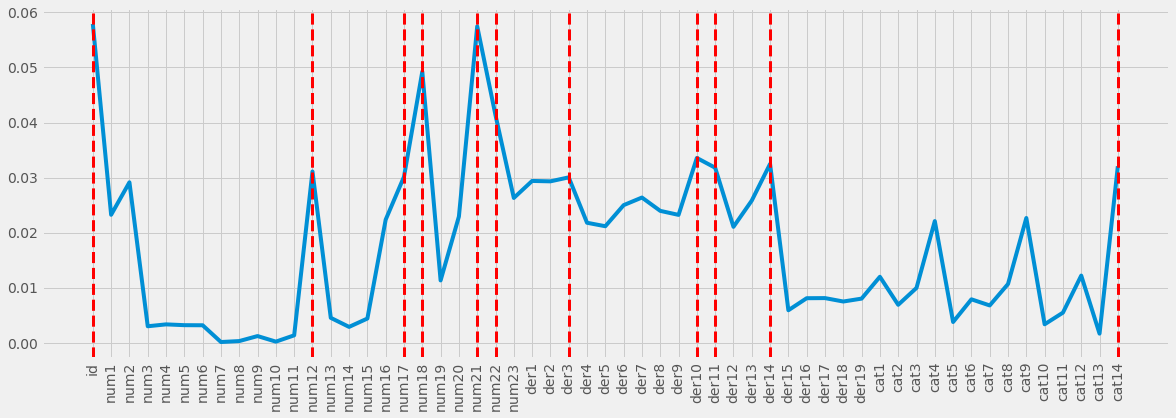

In [84]:
plt.figure(figsize=(18,6))
plt.plot(rf.feature_importances_)
k=0
for i in rf.feature_importances_:
    if i>0.03:
        plt.axvline(x=k, linestyle='--' ,color='red', linewidth=3)
    k+=1
plt.xticks(np.arange(x.shape[1]), x.columns.tolist(), rotation=90)
plt.show()

### Important Features

Seems like we have 10 important features exclusing the `id feature`!!
- num12
- num17
- num18
- num21
- num22
- der3
- der10
- der11
- der14
- cat14

In [94]:
#As num18 and num22 have somany missing values
#print(train.num18.value_counts().head(20))
print(train.num22.value_counts().head(20))

0.361525    17727
0.358329    15549
0.361939    11900
0.368782    11641
0.397492     9693
0.368511     8622
0.359861     8356
0.400000     7298
0.393700     6862
0.294449     6820
0.288791     6700
0.390768     6409
0.388716     6314
0.347275     6270
0.374566     6059
0.366606     5781
0.374433     5640
0.303315     5595
0.381445     5452
0.407431     5388
Name: num22, dtype: int64


In [92]:
print("num18 : ")
print(train.num18.mean())
print(train.num18.std())
print(len(train.num18.value_counts()))
print("num22 : ")
print(train.num22.mean())
print(train.num22.std())
print(len(train.num22.value_counts()))

num18 : 
0.8940252724317082
0.3453929471051589
5012
num22 : 
0.374690589727495
0.045607288997533184
849


In [101]:
num18_sorted = train.num18.unique()
num18_sorted = np.sort(num18_sorted)
print(np.diff(num18_sorted)[:20])

num22_sorted = train.num22.unique()
num22_sorted = np.sort(num22_sorted)
print(np.diff(num22_sorted)[:20])

#these dont have a definite pattern, i.e they haven't been shifted.

[0.01376276 0.05728757 0.00464307 0.01306936 0.00411035 0.04273985
 0.01380355 0.00440439 0.0113265  0.00137621 0.00272777 0.00668221
 0.00905062 0.00502545 0.00124073 0.00123467 0.00122869 0.00122279
 0.00242824 0.00478933]
[0.00877708 0.01769311 0.06398529 0.0078461  0.00191567 0.00118846
 0.00212253 0.00487219 0.00341449 0.0017997  0.00044766 0.00066982
 0.00594067 0.00302079 0.00021427 0.00106844 0.0144772  0.01272705
 0.00285008 0.00928615]


/home/ashu2_gamer/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ashu2_gamer/.local/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


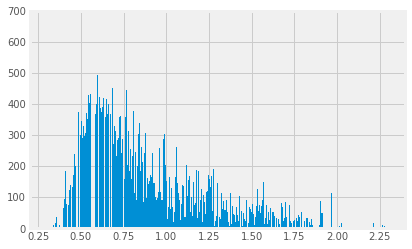

In [118]:
plt.hist(train.num18, bins=5000, range=(0.3,2.3), ) #bins = 1000 for faster results.
plt.show()

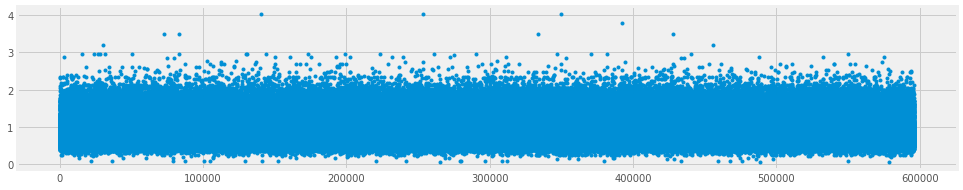

In [121]:
plt.figure(figsize=(15,3))
plt.plot(train.num18, '.')
plt.show()

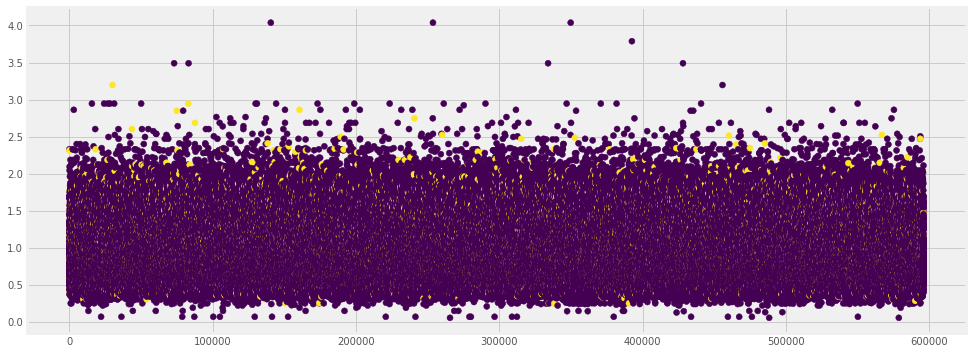

In [124]:
plt.figure(figsize=(15,6))
plt.scatter(range(len(train.num18)), train.num18, c=y)
plt.show()

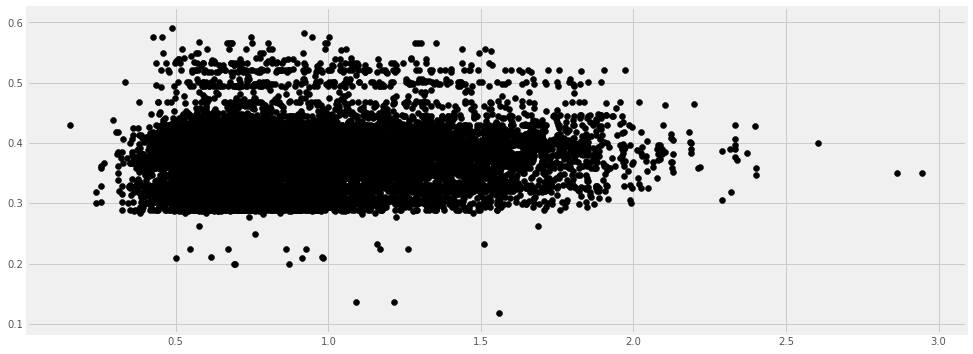

In [131]:
plt.figure(figsize=(15,6))
plt.scatter(train.num18[:20000], train.num22[:20000], c='black')
plt.show()

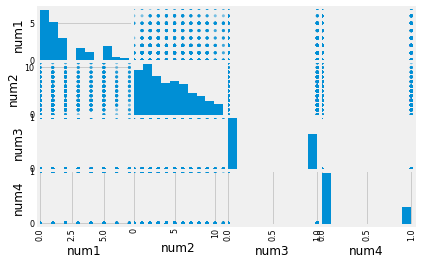

In [11]:
#takes a long time to load for all data
pd.plotting.scatter_matrix(train[:2000][train.columns[1:5]])
plt.show()

In [5]:
for i in train.columns:
    print(i, ":", len(train[i].value_counts()), end="  |  ")

id : 596000  |  num1 : 8  |  num2 : 12  |  num3 : 2  |  num4 : 2  |  num5 : 2  |  num6 : 2  |  num7 : 2  |  num8 : 2  |  num9 : 2  |  num10 : 2  |  num11 : 5  |  num12 : 14  |  num13 : 2  |  num14 : 2  |  num15 : 2  |  num16 : 10  |  num17 : 19  |  num18 : 5012  |  num19 : 4  |  num20 : 183  |  num21 : 70482  |  num22 : 849  |  num23 : 15  |  der1 : 10  |  der2 : 10  |  der3 : 10  |  der4 : 6  |  der5 : 7  |  der6 : 11  |  der7 : 10  |  der8 : 11  |  der9 : 8  |  der10 : 26  |  der11 : 20  |  der12 : 11  |  der13 : 14  |  der14 : 24  |  der15 : 2  |  der16 : 2  |  der17 : 2  |  der18 : 2  |  der19 : 2  |  cat1 : 4  |  cat2 : 2  |  cat3 : 7  |  cat4 : 12  |  cat5 : 2  |  cat6 : 2  |  cat7 : 10  |  cat8 : 2  |  cat9 : 18  |  cat10 : 2  |  cat11 : 2  |  cat12 : 5  |  cat13 : 3  |  cat14 : 104  |  target : 2  |  

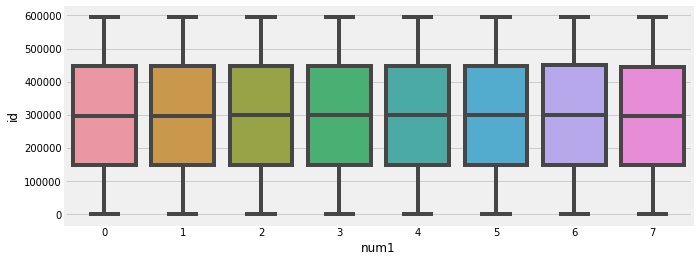

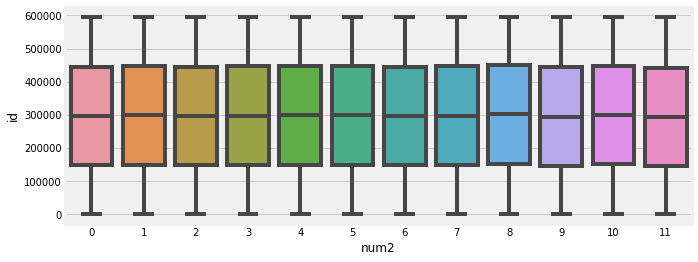

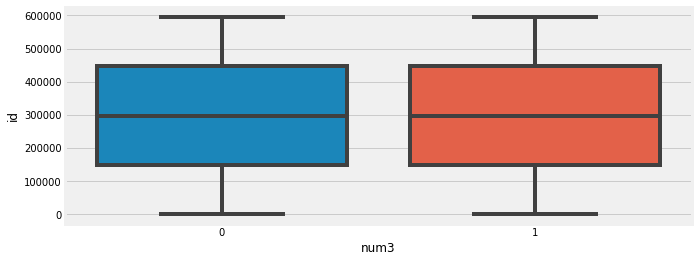

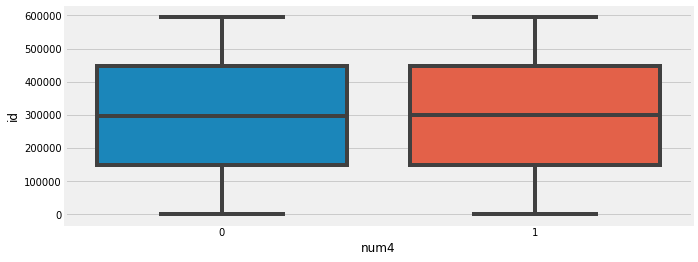

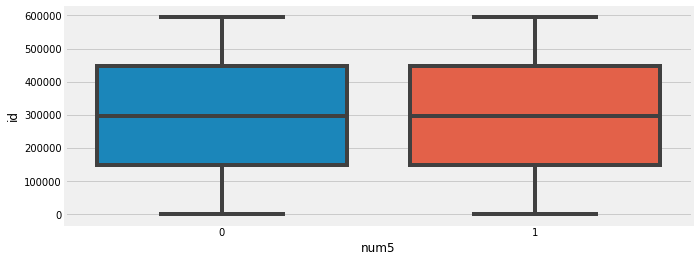

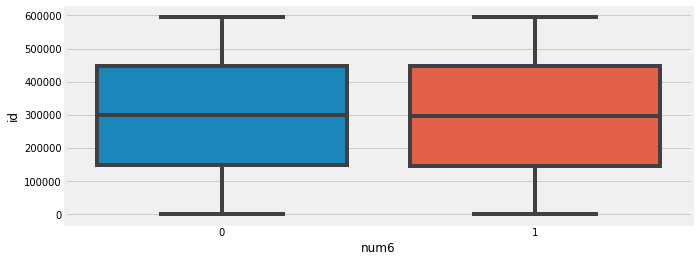

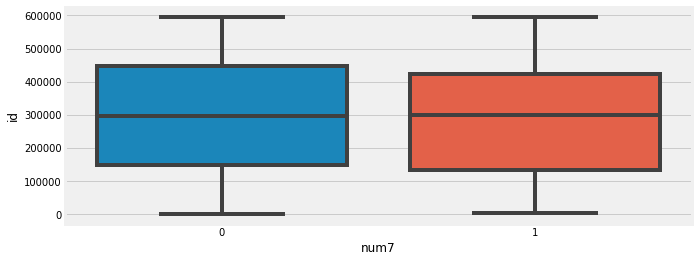

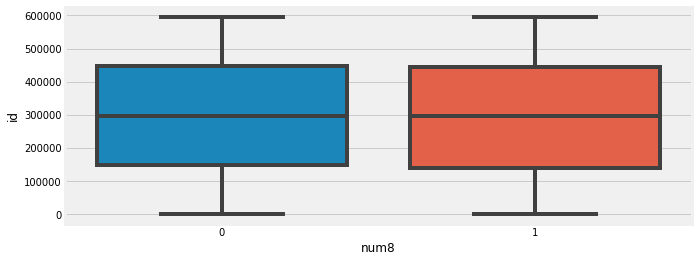

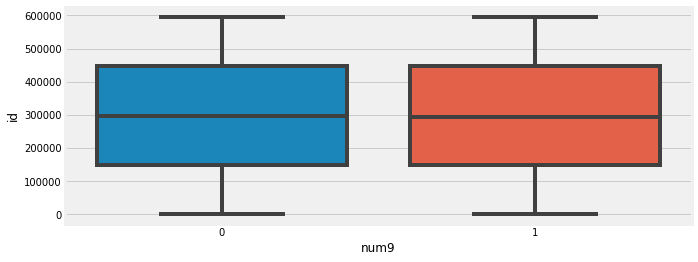

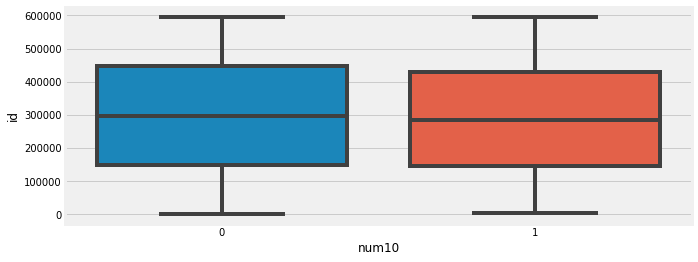

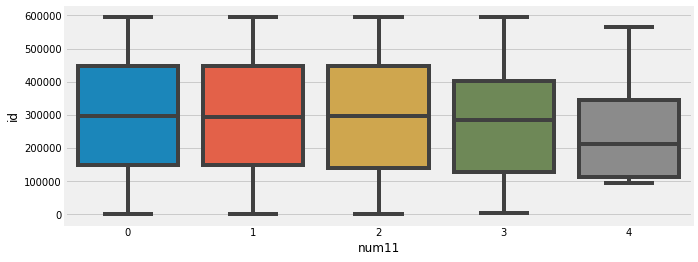

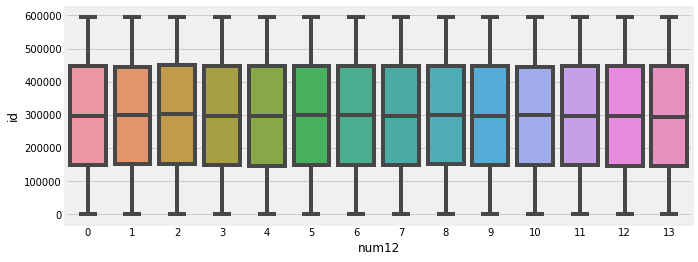

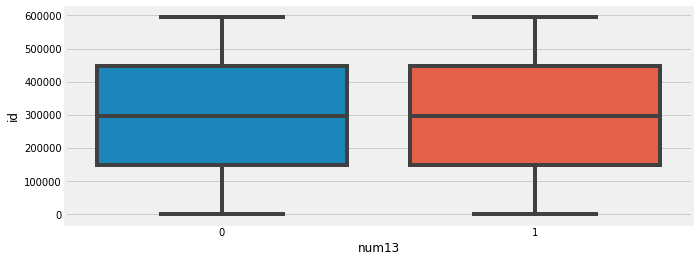

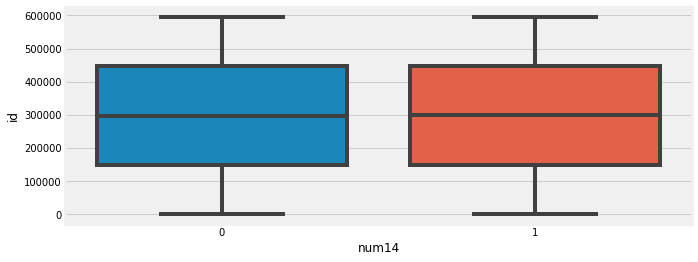

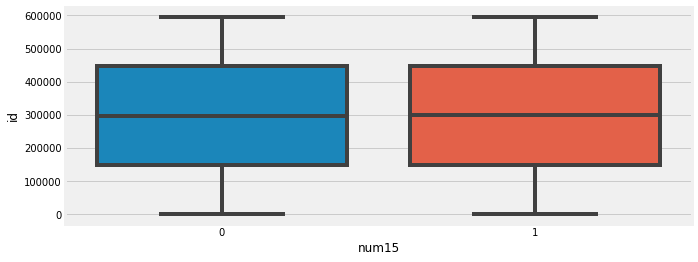

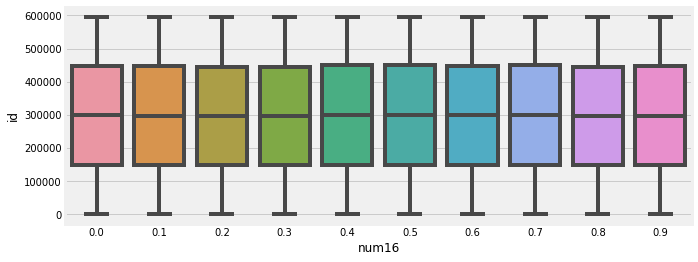

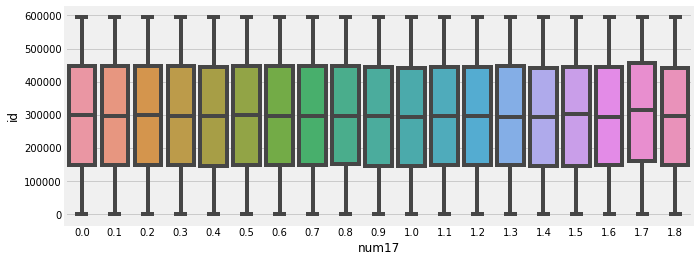

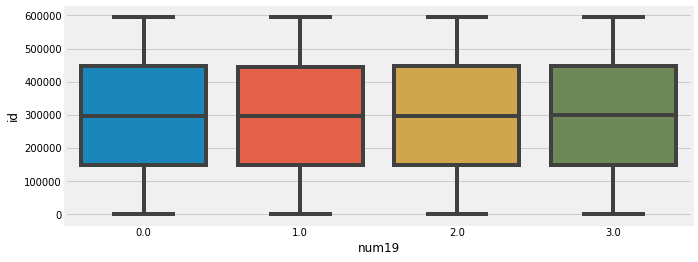

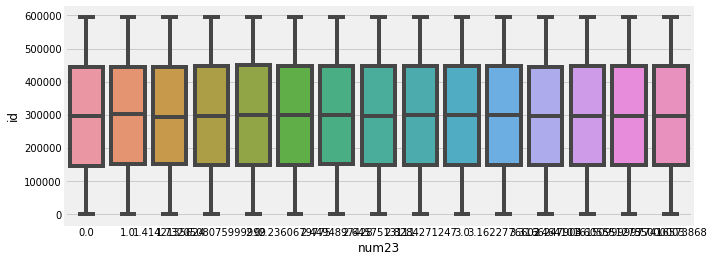

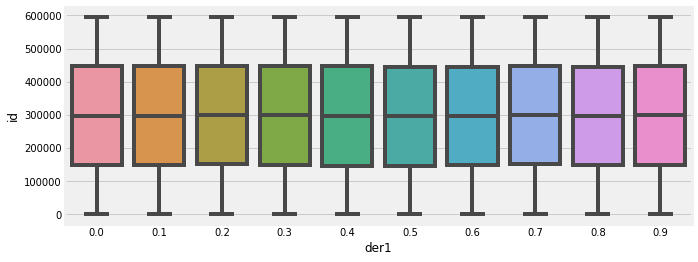

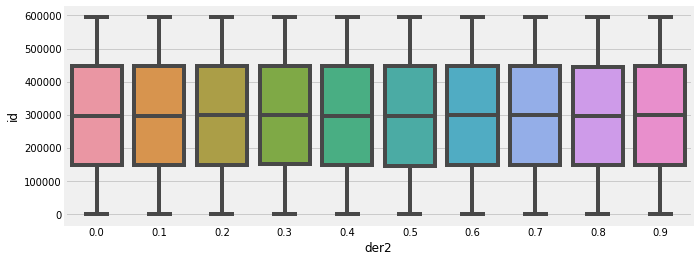

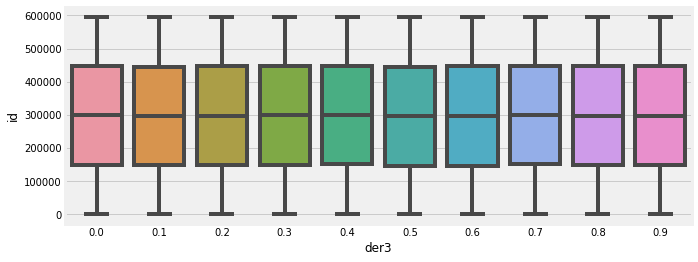

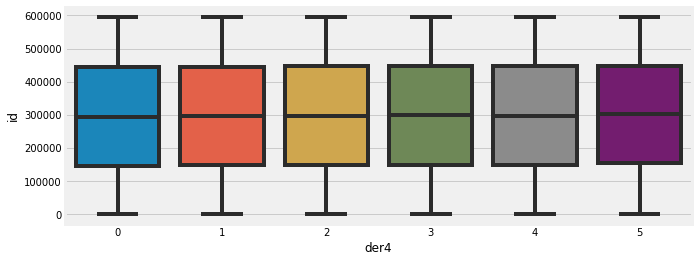

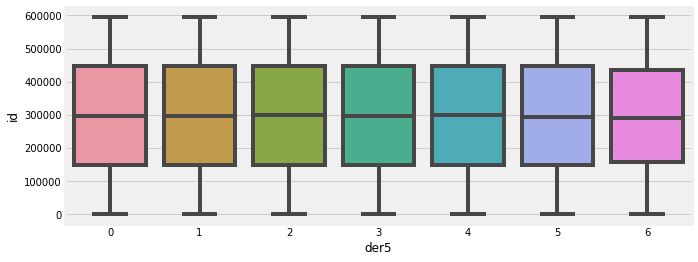

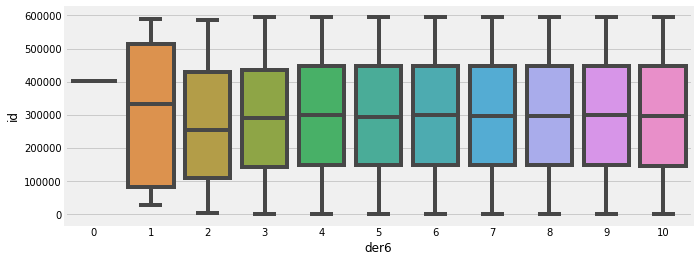

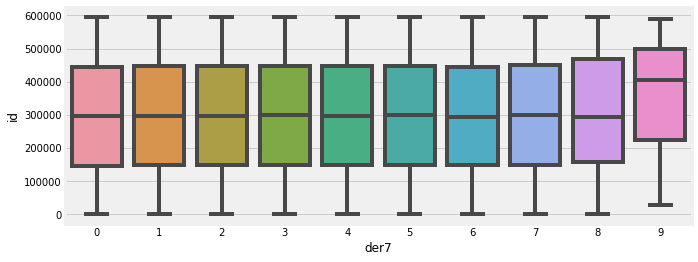

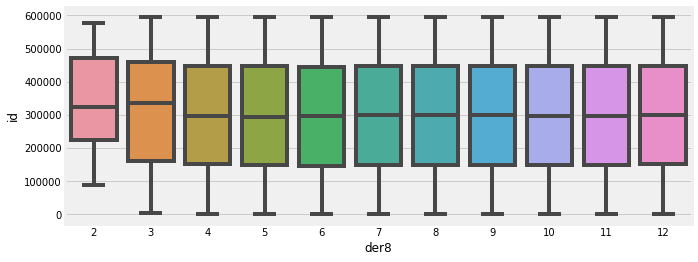

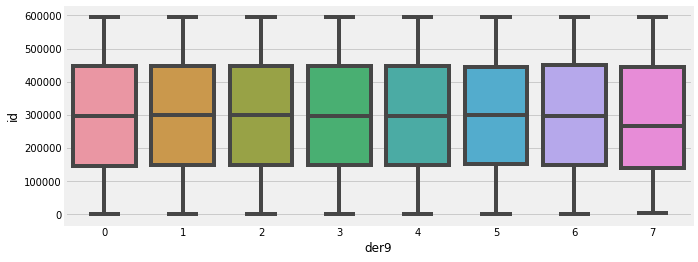

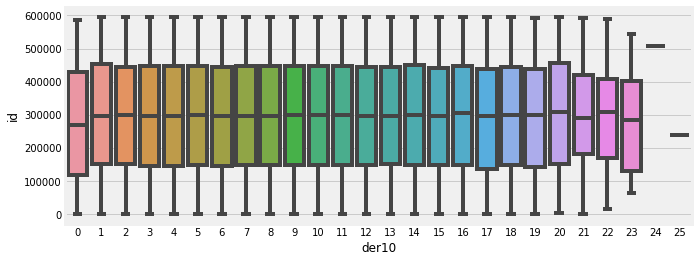

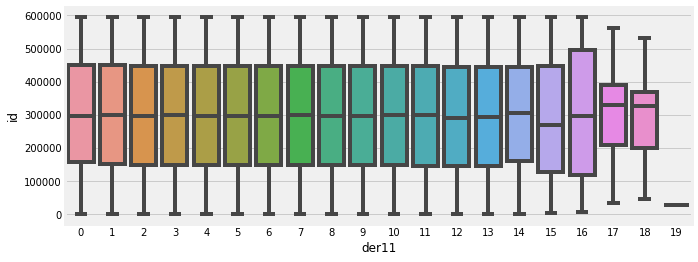

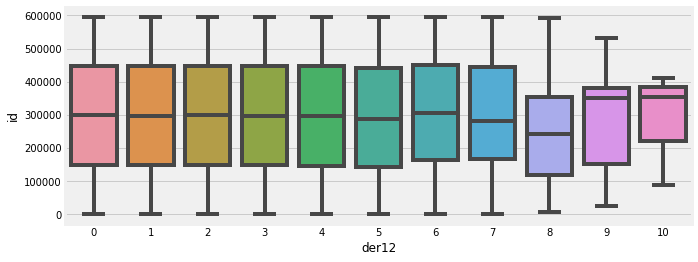

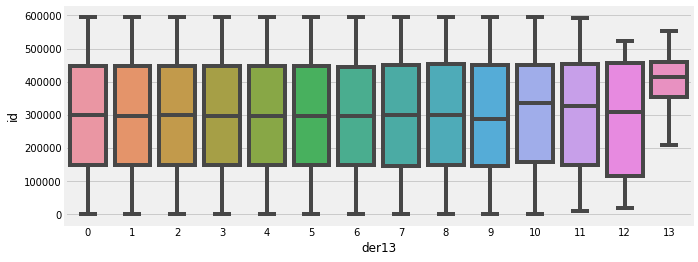

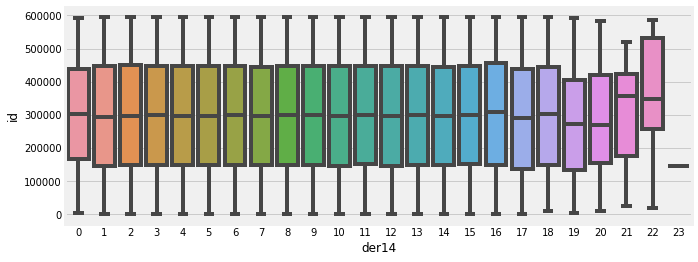

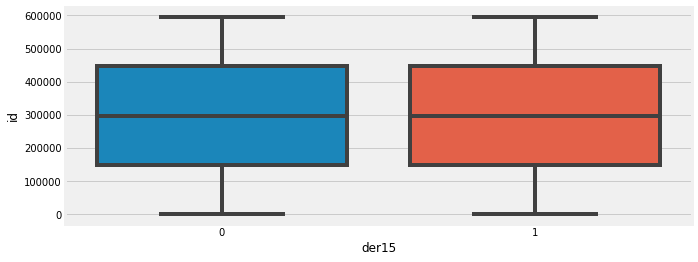

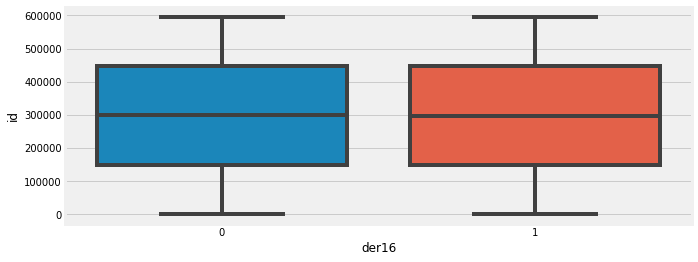

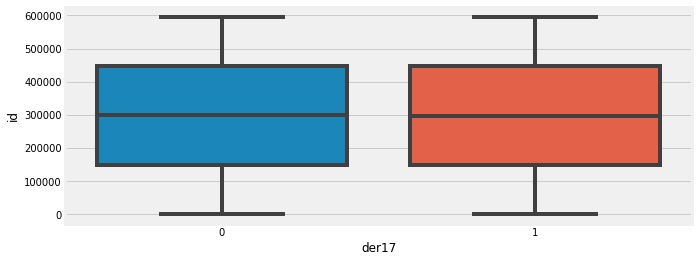

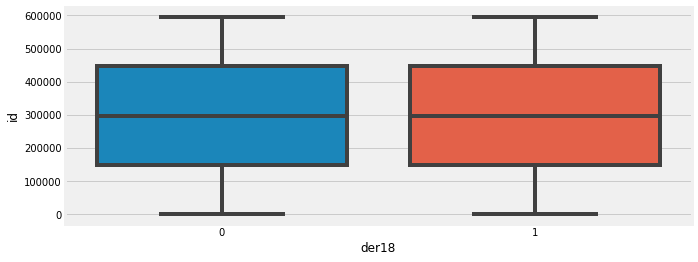

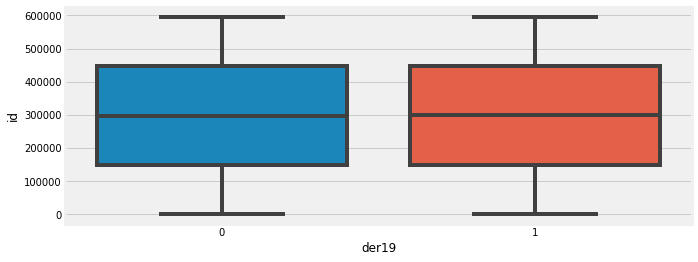

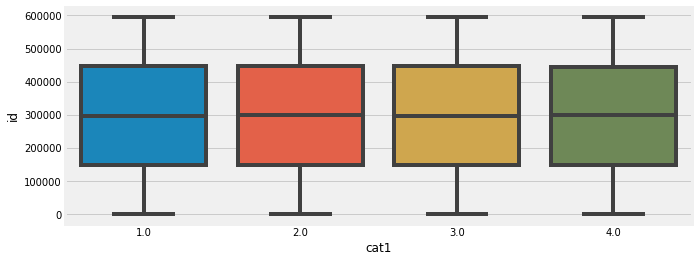

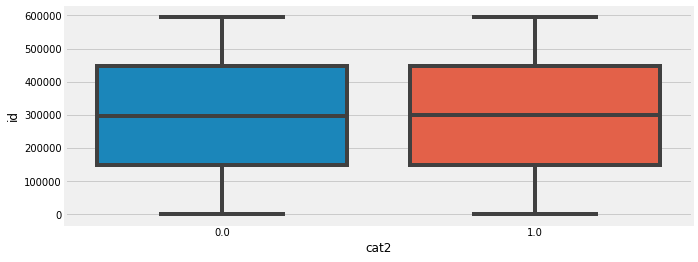

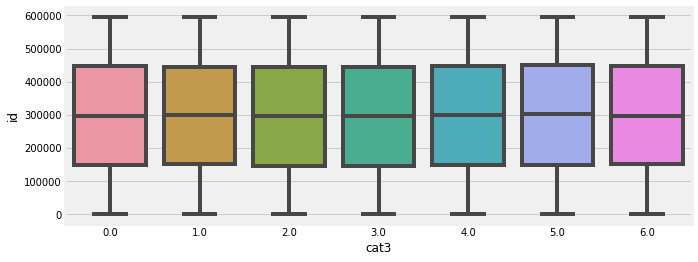

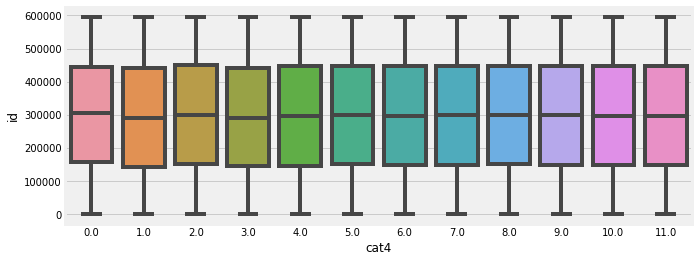

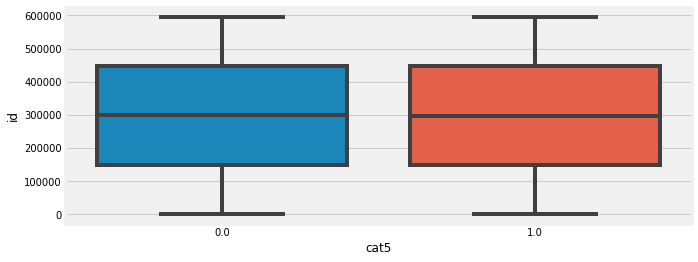

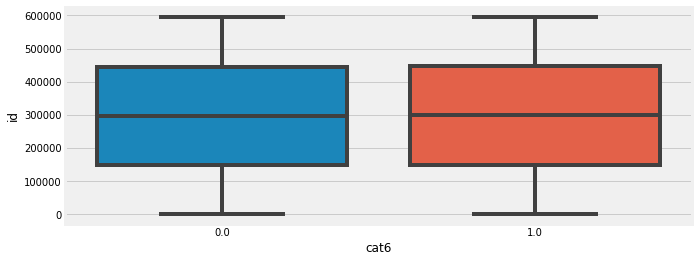

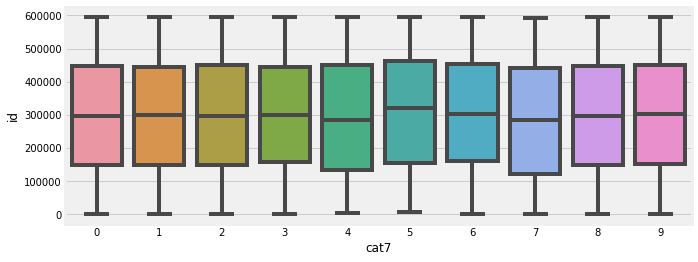

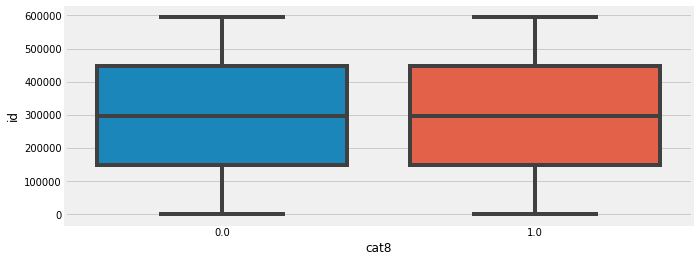

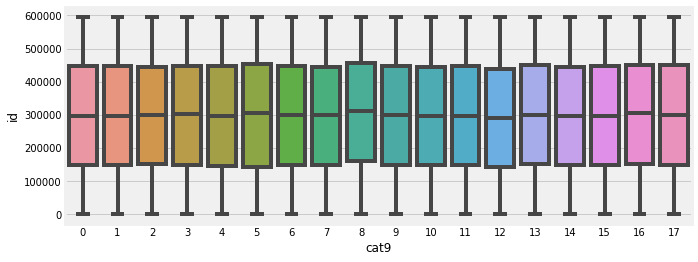

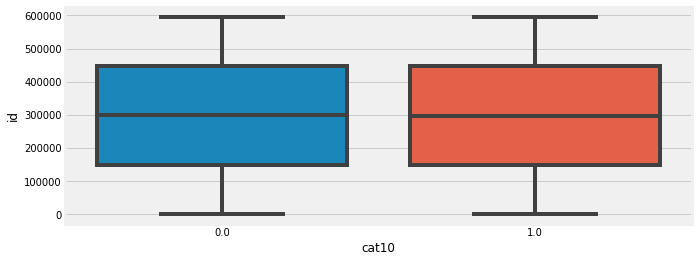

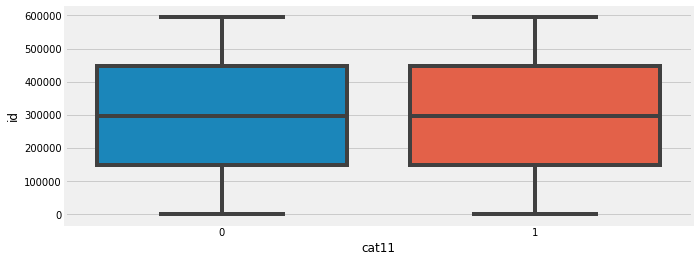

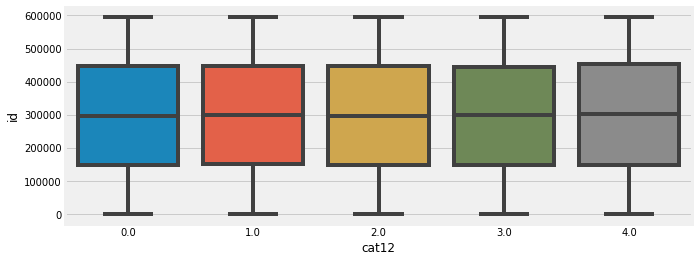

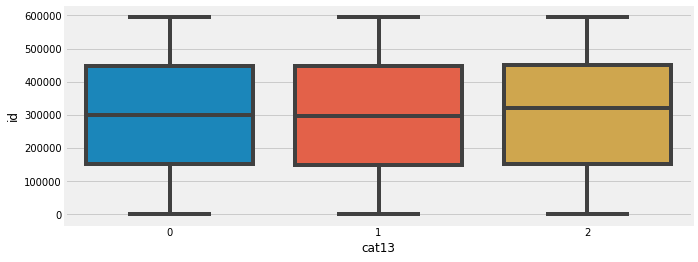

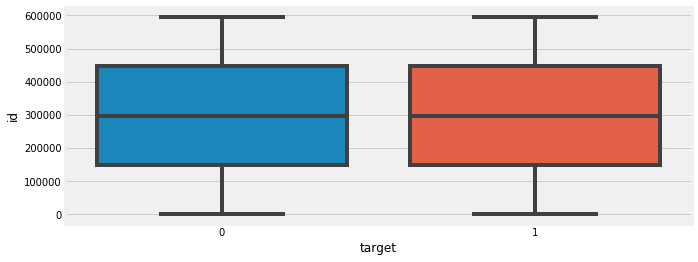

In [5]:
for i in train.columns:
    if len(train[i].value_counts())<100:
        plt.figure(figsize=(10,4))
        sns.boxplot(
            x = i,
            y = 'id',
            data = train
        
        )
        plt.show()